In [1]:
import torchvision
import torch

In [2]:
transform = torchvision.transforms.Compose(
    transforms=[
    torchvision.transforms.ToTensor(),
]
)

trainset = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [4]:
print("Training images: ", len(trainloader))
print("Test images: ", len(testloader))

Training images:  15000
Test images:  2500


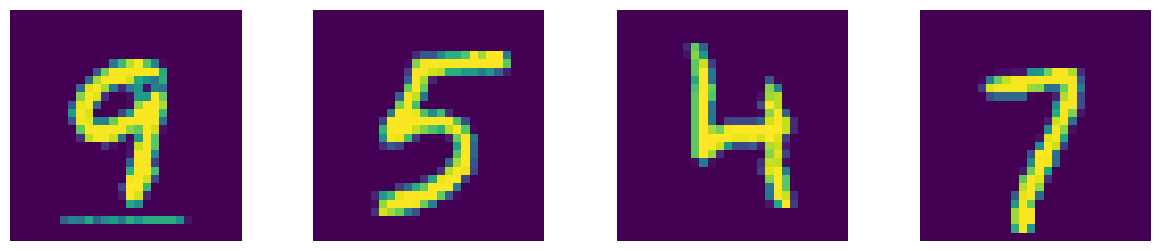

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
trainiter = iter(trainloader)
images, labels = next(trainiter)

first_batch = images[:4]


fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    reshaped = np.transpose(first_batch[i], (1,2,0))
    plt.imshow(reshaped)
    
    
    axes[i].imshow(reshaped)
    axes[i].axis('off')

plt.show()





In [6]:
print(images[0].size())
print("Min pixel: ", torch.min(images))
print("Max pixel: ", torch.max(images))

torch.Size([1, 28, 28])
Min pixel:  tensor(0.)
Max pixel:  tensor(1.)


In [7]:
for i, (images, labels) in enumerate(trainloader):
    images = images.view(images.size(0), -1)

In [18]:
class Model():
    def __init__(self):
        self.w1 = torch.randn(784,128)*0.01
        self.b1 = torch.zeros(128)
        self.w2 = torch.randn(128,10)*0.01
        self.b2 = torch.zeros(10)
        
    def forward(self, image):
        self.z1 = torch.matmul(image, self.w1) + self.b1
        self.a1 = torch.sigmoid(self.z1)
        self.z2 = torch.matmul(self.a1, self.w2) + self.b2
        return torch.sigmoid(self.z2)


    def loss(self, output, label):
        softmaxed = torch.softmax(output, dim=1)
        crossentropy = -torch.log(softmaxed[label])

        print("Label: ", label)
        print("Predicted prob:", softmaxed[label])
        print("Loss: ", crossentropy)
    

In [19]:
model = Model()
output = model.forward(images[0])
print(output)
model.loss(output, labels[0])

tensor([0.5057, 0.4934, 0.4828, 0.4989, 0.5137, 0.5061, 0.5204, 0.4843, 0.5023,
        0.4655])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)